# Regresiones a respuesta Discreta

In [1]:
suppressMessages(library(ggplot2))

#función sigmoide
eta = seq(-10,10,by=0.01)
sigma <- function(x){return( exp(x)/(exp(x)+1))}

ERROR: Error in library(ggplot2): there is no package called ‘ggplot2’


In [2]:
#Ejemplo de regresión logística para datos SAT
datos <- read.csv("data/datosSAT.csv",header=TRUE,sep=";")
summary(datos)
#TrLevel es el nivel alcanzado: 1 si pasó el curso 0 si no
#SAT es el puntaje obtenido en el test de Lenguaje
ggplot(datos, aes(SAT, fill = as.factor(TrLevel))) +
  geom_density(alpha = .4)

    TrLevel         SAT       
 Min.   :0.0   Min.   :463.0  
 1st Qu.:0.0   1st Qu.:543.5  
 Median :1.0   Median :567.5  
 Mean   :0.7   Mean   :559.5  
 3rd Qu.:1.0   3rd Qu.:582.0  
 Max.   :1.0   Max.   :649.0  

ERROR: Error in ggplot(datos, aes(SAT, fill = as.factor(TrLevel))): no se pudo encontrar la función "ggplot"


In [3]:
#estimación regresion logística
res<- glm(TrLevel ~ SAT, data=datos,family = binomial(link = "logit"))
summary(res)


Call:
glm(formula = TrLevel ~ SAT, family = binomial(link = "logit"), 
    data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2918  -0.1830   0.3662   0.5057   1.5301  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -31.65827   12.69071  -2.495   0.0126 *
SAT           0.05878    0.02296   2.560   0.0105 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.652  on 29  degrees of freedom
Residual deviance: 21.993  on 28  degrees of freedom
AIC: 25.993

Number of Fisher Scoring iterations: 5


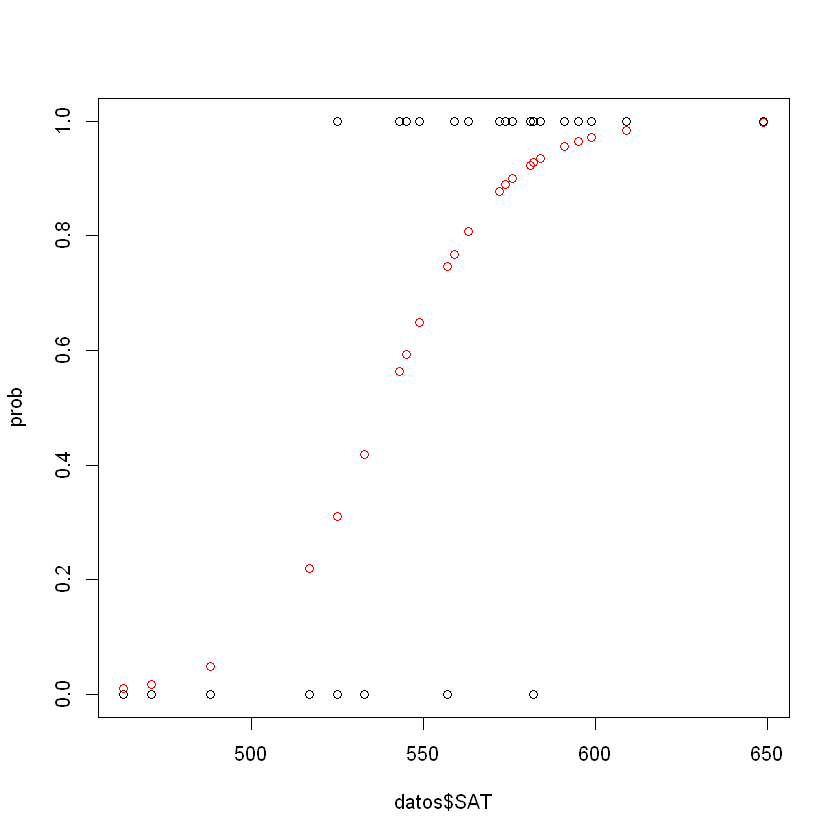

In [4]:
#graficamos los resultados
dat <-cbind(rep(1,30),datos$SAT)
prob <- sigma(dat%*%res$coefficients)
plot(datos$SAT,prob,col="red",ylim=c(0,1))
points(datos$SAT,datos$TrLevel)

**Ejercicio II.1:**

***a) Interprete los resultados***

* Coeficientes (Intercepto y SAT): El intercepto y el coeficiente para la variable SAT son significativos, lo que indica que hay una relación estadísticamente significativa entre los puntajes SAT y la probabilidad de alcanzar el TrLevel 1. El coeficiente para SAT es positivo (aproximadamente 0.05878), lo que implica que, manteniendo todo lo demás constante, un aumento en el puntaje SAT está asociado con un incremento en la log-odds de tener un TrLevel de 1. En términos más simples, los estudiantes con puntajes SAT más altos tienen mayores probabilidades de pasar el curso o alcanzar el nivel objetivo.

* Valor p: Los valores p para ambos, el intercepto y la variable SAT, son menores que 0.05, lo que sugiere que estos efectos son estadísticamente significativos y es poco probable que se deban al azar.

* Deviance Residuals: Los residuales de devianza proporcionan una idea de cómo el modelo se ajusta a los datos. En un modelo bien ajustado, esperaríamos ver los residuales distribuidos uniformemente alrededor de cero.

* Gráfico de densidad: Muestra la distribución de los puntajes SAT para los dos grupos de TrLevel. Si las distribuciones están bien separadas, significa que el SAT es un buen predictor del nivel alcanzado. En este caso, parece haber cierta superposición, lo que indica que, aunque el SAT es un predictor significativo, no es perfecto.

* Gráfico de dispersión (prob vs. datos$SAT): Muestra la relación entre los puntajes SAT y la probabilidad estimada de alcanzar TrLevel 1. La línea de tendencia no se muestra, pero las probabilidades estimadas (puntos rojos) sugieren que a medida que aumenta el SAT, la probabilidad de obtener un TrLevel de 1 también aumenta. La dispersión de los puntos (círculos blancos) alrededor de la línea roja indica variabilidad en los resultados y sugiere que otros factores además del SAT podrían influir en el TrLevel.


***b) Indague en la función glm el método de estimación del modelo logit que utiliza y los principales parámetros disponibles.***

La función glm() en R se utiliza para ajustar modelos lineales generalizados (GLM), que es una extensión flexible de la regresión lineal ordinaria que permite la respuesta de variables con distribuciones de error que no son normalmente distribuidas. La regresión logística es un caso especial de GLM donde la variable de respuesta es binaria, y por lo tanto sigue una distribución binomial.

El método de estimación predeterminado que utiliza glm() para los parámetros del modelo es la maximización de la verosimilitud. Este método busca los valores de los parámetros del modelo que hacen que los datos observados sean lo más probables posible. En el caso de la regresión logística, esto implica encontrar los coeficientes que mejor explican la relación entre las variables independientes y la probabilidad de que la respuesta sea 1.

Entre los principales parámetros disponibles en glm, se encuentran:

* family: especifica la distribución de la respuesta. En este caso, se utiliza binomial para modelar una respuesta binaria.
* link: define la función de enlace, que en este caso es "logit".
* data: el conjunto de datos utilizado para el modelo.
* control: una lista de parámetros para controlar el proceso de ajuste del modelo.

***c) Describa formalmente el método de estimación del modelo logit que usa glm y haga una comparación con los otros métodos disponibles. Para ello use como referencia el Cap. 8 de "Machine Learning, a Probabilistic Perspective", K. Murphy.***

In [5]:
#ejemplo de regresión de Poisson que considera datos simulados sobre 200 estudiantes de EM
#la variable a explicar es el número de premios obtenidos y las variables explicativas
#son sus puntajes en el examen final de matemáticas, y el tipo de programa en que 
#están matriculados: general, vocacional o académico.
require(ggplot2)

p <- read.csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")
p <- within(p, {
  prog <- factor(prog, levels=1:3, labels=c("General", "Academic", 
                                                     "Vocational"))
  id <- factor(id)
})
print(p[1:20,])
summary(p)

    id num_awards       prog math
1   45          0 Vocational   41
2  108          0    General   41
3   15          0 Vocational   44
4   67          0 Vocational   42
5  153          0 Vocational   40
6   51          0    General   42
7  164          0 Vocational   46
8  133          0 Vocational   40
9    2          0 Vocational   33
10  53          0 Vocational   46
11   1          0 Vocational   40
12 128          0   Academic   38
13  16          0 Vocational   44
14 106          0 Vocational   37
15  89          0 Vocational   40
16 134          0    General   39
17  19          0    General   43
18 145          0 Vocational   38
19  11          0   Academic   45
20 117          0 Vocational   39


       id        num_awards           prog          math      
 1      :  1   Min.   :0.00   General   : 45   Min.   :33.00  
 2      :  1   1st Qu.:0.00   Academic  :105   1st Qu.:45.00  
 3      :  1   Median :0.00   Vocational: 50   Median :52.00  
 4      :  1   Mean   :0.63                    Mean   :52.65  
 5      :  1   3rd Qu.:1.00                    3rd Qu.:59.00  
 6      :  1   Max.   :6.00                    Max.   :75.00  
 (Other):194                                                  

In [6]:
with(p, tapply(num_awards, prog, function(x) {
  sprintf("M (SD) = %1.2f (%1.2f)", mean(x), sd(x))
}))

General               Academic             Vocational 
"M (SD) = 0.20 (0.40)" "M (SD) = 1.00 (1.28)" "M (SD) = 0.24 (0.52)"

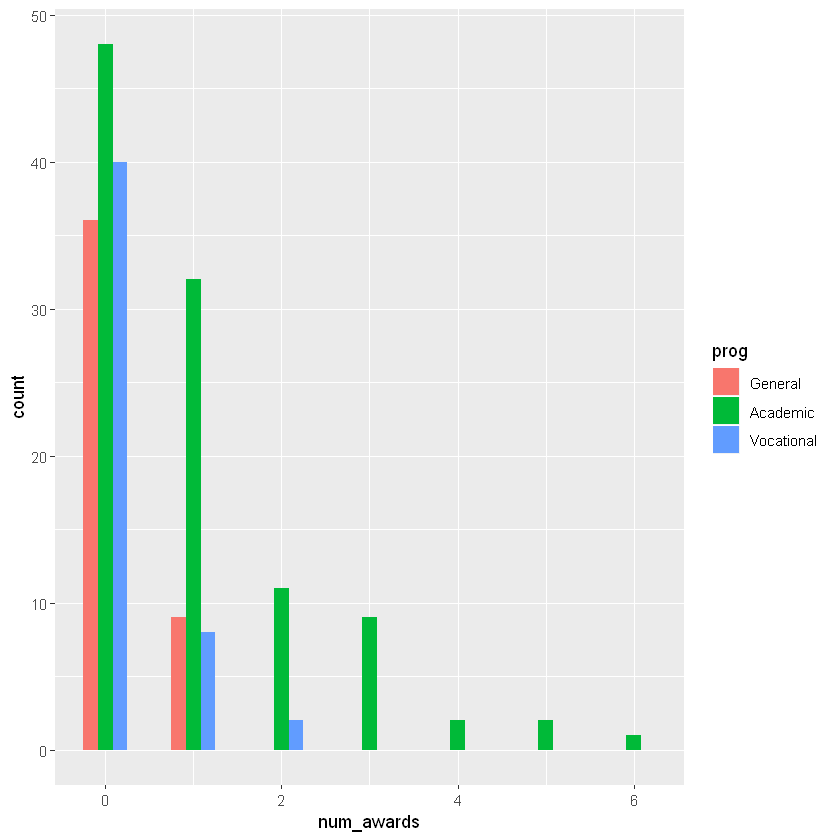

In [7]:
ggplot(p, aes(num_awards, fill = prog)) +
  geom_histogram(binwidth=.5, position="dodge")

In [8]:
summary(m1 <- glm(num_awards ~ prog + math, family="poisson", data=p))


Call:
glm(formula = num_awards ~ prog + math, family = "poisson", data = p)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2043  -0.8436  -0.5106   0.2558   2.6796  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -5.24712    0.65845  -7.969 1.60e-15 ***
progAcademic    1.08386    0.35825   3.025  0.00248 ** 
progVocational  0.36981    0.44107   0.838  0.40179    
math            0.07015    0.01060   6.619 3.63e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 287.67  on 199  degrees of freedom
Residual deviance: 189.45  on 196  degrees of freedom
AIC: 373.5

Number of Fisher Scoring iterations: 6


In [9]:
with(m1, cbind(res.deviance = deviance, df = df.residual,
  p = pchisq(deviance, df.residual, lower.tail=FALSE)))

res.deviance df  p        
[1,] 189.4496     196 0.6182274

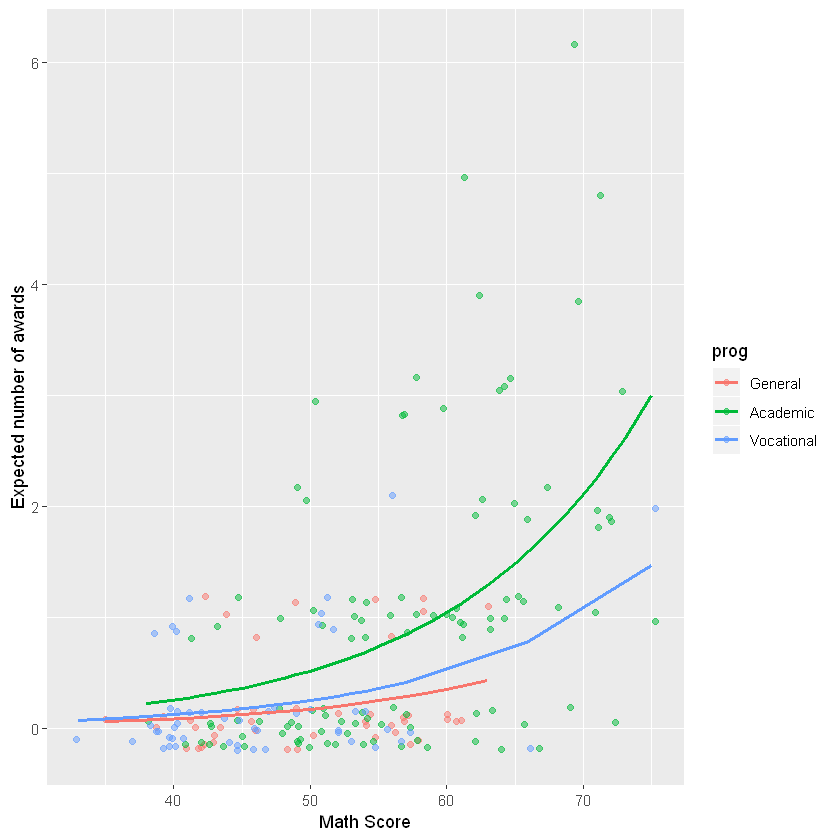

In [10]:
## calculate and store predicted values
p$phat <- predict(m1, type="response")

## order by program and then by math
p <- p[with(p, order(prog, math)), ]

## create the plot
ggplot(p, aes(x = math, y = phat, colour = prog)) +
  geom_point(aes(y = num_awards), alpha=.5, position=position_jitter(h=.2)) +
  geom_line(size = 1) +
  labs(x = "Math Score", y = "Expected number of awards")

**Ejercicio II.2:**

a) Interprete los resultados de este análisis

* El intercepto tiene un valor estimado de aproximadamente -5.24712, lo que representa el logaritmo del recuento esperado de premios cuando todas las variables predictoras son cero. En la práctica, este valor no tiene una interpretación directa ya que no es posible tener un puntaje de matemáticas de cero, y el programa no puede ser los tres tipos a la vez.
* progAcademic tiene un coeficiente positivo significativo (aproximadamente 1.08386), lo que sugiere que los estudiantes en el programa académico reciben exponencialmente más premios que los del programa general, manteniendo constantes los demás factores.
* progVocational también tiene un coeficiente positivo (aproximadamente 0.36981), pero no es estadísticamente significativo (p > 0.05), lo que indica que no hay una diferencia significativa en el número de premios entre los programas vocacionales y generales, manteniendo todos los demás factores constantes.
* math tiene un coeficiente positivo significativo (aproximadamente 0.07015), lo que indica que, por cada punto adicional en el puntaje de matemáticas, se espera que el número de premios aumente por un factor de exp(0.07015), manteniendo todo lo demás constante.

b) Rehaga sus cálculos considerando una variable explicativa a la vez. Interprete sus resultados

c) Investigue estrategias para comparar los modelos en (a) y (b). Concluya.